In [1]:
from a6_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

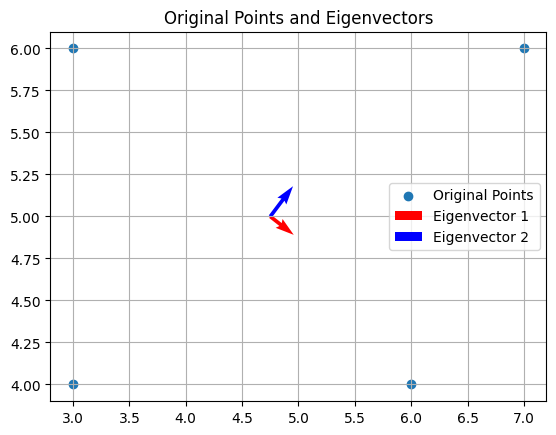

In [2]:
# (a) Solve the following assignment for practice:
# You are given four points A(3,4), B(3, 6), C(7, 6) and D(6, 4).
# Calculate the eigenvectors and eigenvalues for the given set of points.
# You can use SVD. Plot the points and corresponding eigenvectors (originating at the data mean).

points = np.array([[3, 4], [3, 6], [7, 6], [6, 4]])
mean_point = np.mean(points, axis=0)
centered_points = points - mean_point
X = centered_points.T
U, S, VT = np.linalg.svd(X)
eigenvectors = VT
eigenvalues = S**2

plt.scatter(points[:, 0], points[:, 1], label='Original Points')
plt.quiver(mean_point[0], mean_point[1], eigenvectors[0, 0], eigenvectors[1,
           0], scale=3, scale_units='xy', color='r', label='Eigenvector 1')

plt.quiver(mean_point[0], mean_point[1], eigenvectors[0, 1], eigenvectors[1,
           1], scale=3, scale_units='xy', color='b', label='Eigenvector 2')

plt.title('Original Points and Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


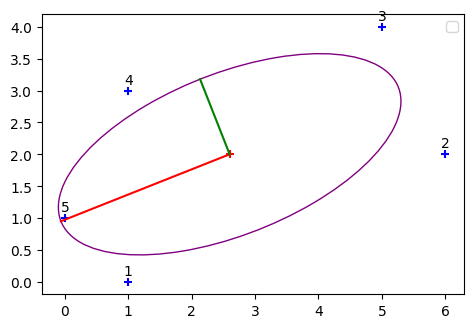

In [3]:
# (b) Write a script to calculate and visualize PCA from 2D data from the file points.txt.
# and
# (c) The matrix U contains the eigenvectors that represent the basis of our PCA subspace.
# Draw the eigenvectors on the plot from the previous task.

points = np.loadtxt("data/points.txt")
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(points[:, 0], points[:, 1], color='blue', marker='+')
for i in range(len(points)):
    plt.annotate(i+1, (points[i, 0], points[i, 1]),
                 textcoords="offset points", xytext=(0, 5), ha='center')


N = len(points)
X = points.T
mean = np.mean(points, axis=0)
plt.scatter(mean[0], mean[1], color='red', marker='+')
mean = mean.reshape(2, 1)
Xd = X - mean
C = np.dot(Xd, Xd.T) / (N - 1)
drawEllipse(mean, C)
U, S, VT = np.linalg.svd(C)
# mulitply each eigenvector with eigenvalue so the length isn't 1
U1 = U.T[0] * np.sqrt(S[0])
U2 = U.T[1] * np.sqrt(S[1])
plt.plot([mean[0], mean[0] + U1[0]], [mean[1], mean[1] + U1[1]],
         color='r')
plt.plot([mean[0], mean[0] + U2[0]], [mean[1], mean[1] + U2[1]],
         color='g')
plt.legend()

Percentage of variance explained by the first eigenvector: 83.57%


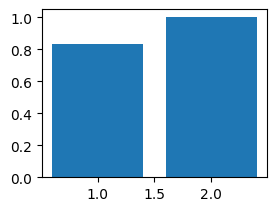

In [4]:
# (d) The eigenvalues represent the reconstruction error we incur if we discard the corresponding eigenvector.
# Plot the cumulative graph of the eigenvalues and normalize it, so the largest value will be 1.
# From the graph, determine how many percent of the information will we retain if we discard the
# second eigenvector. To put it differently, what percent of the variance is explained just by using
# the first eigenvector?
cum_sum = np.cumsum(S)
cum_sum /= np.max(cum_sum)
plt.subplot(2, 2, 3)
plt.bar(np.arange(1, len(S) + 1), cum_sum)
print(
    f"Percentage of variance explained by the first eigenvector: {cum_sum[0] * 100:.2f}%")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


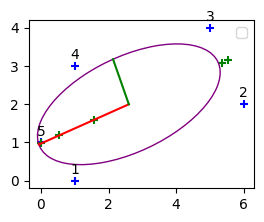

In [5]:
# (e) Now remove the direction of the lowest variance from the input data.
# This means we will project the data into the subspace of the first eigenvector
U_diminished = np.copy(U)
U_diminished[:, 1] = 0
Y = np.dot(U.T, Xd)
Xq = np.dot(U_diminished, Y) + mean
plt.subplot(2, 2, 2)
plt.scatter(points[:, 0], points[:, 1], color='blue', marker='+')
for i in range(len(points)):
    plt.annotate(i+1, (points[i, 0], points[i, 1]),
                 textcoords="offset points", xytext=(0, 5), ha='center')
plt.scatter(Xq[0], Xq[1], color='green', marker='+')
drawEllipse(mean, C)
plt.plot([mean[0], mean[0] + U1[0]], [mean[1], mean[1] + U1[1]],
         color='r')
plt.plot([mean[0], mean[0] + U2[0]], [mean[1], mean[1] + U2[1]],
         color='g')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Closest point:  [5. 4.]
Closest point transformed:  [5.54021325 3.16269992]


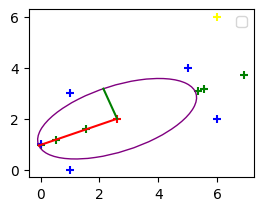

In [10]:
# (f) For the point qpoint = [6, 6]T , calculate the closest point from the input data
# (using Euclidean distance). Which point is the closest? Then, project all the points (including qpoint)
# to PCA subspace (calculated without qpoint) and remove the variation
# in the direction of the second vector. Calculate the distances again.
#  Which point is the closest to qpoint now? Visualize the reconstruction.
q_point = np.array([6, 6])
distances = np.linalg.norm(points - q_point, axis=1)
closest_point = points[np.argmin(distances)]
print("Closest point: ", closest_point)
new_points = np.vstack([points, q_point])
X2 = new_points.T
X2d = X2 - mean

Y2 = np.dot(U.T, X2d)
Xq2 = np.dot(U_diminished, Y2) + mean
plt.subplot(2, 2, 4)
plt.scatter(Xq2[0], Xq2[1], color='green', marker='+')
plt.scatter(points[:, 0], points[:, 1], color='blue', marker='+')
plt.scatter(mean[0], mean[1], color='red', marker='+')
plt.scatter(q_point[0], q_point[1], color='yellow', marker='+')
drawEllipse(mean, C)
plt.plot([mean[0], mean[0] + U1[0]], [mean[1], mean[1] + U1[1]],
         color='r')
plt.plot([mean[0], mean[0] + U2[0]], [mean[1], mean[1] + U2[1]],
         color='g')
distances = np.linalg.norm(Xq2.T - Xq2.T[-1], axis=1)
distances = distances[:-1]
closest_point = Xq2[:, np.argmin(distances)]
print("Closest point transformed: ", closest_point)
plt.legend()
plt.show()